In [1]:
import h5py
import numpy as np 
from astropy.io import fits
from astropy.table import Table
# -- desi -- 
import desispec.io as desiIO
# -- FOMOspec -- 
from fomospec import util as UT
from fomospec import catalog as Cat

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [26]:
galid = 1 #10924

In [27]:
lgal = Cat.LGal()

In [28]:
source, meta = lgal.Spectra(galid, type='source')
desibgs, _ = lgal.Spectra(galid, type='desibgs')

In [29]:
zred = meta['REDSHIFT']

(0.0, 15.0)

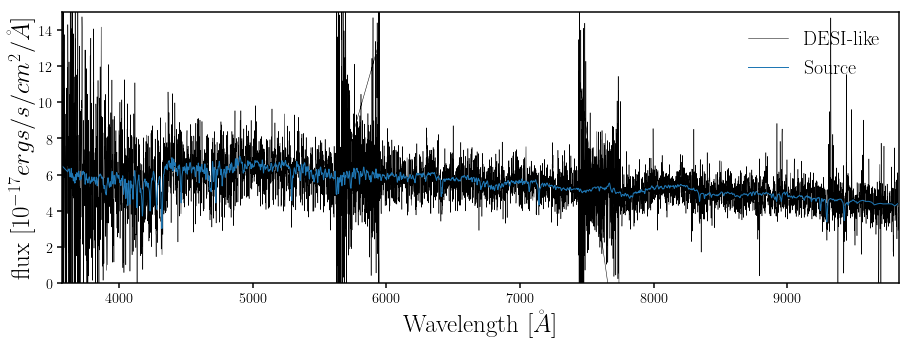

In [30]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(desibgs['wave'], desibgs['flux'], c='k', lw=0.5, label='DESI-like')
sub.plot(source['wave'], source['flux'], c='C0', lw=1, label='Source')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([desibgs['wave'].min(), desibgs['wave'].max()])
sub.set_ylabel('flux [$10^{-17} ergs/s/cm^2/\AA$]', fontsize=25)
sub.set_ylim([0., 15.])

In [31]:
ffly_out, ffly_prop = lgal.SpecFit(galid, type='desibgs', fit='firefly', dust='on')

(0.0, 15.0)

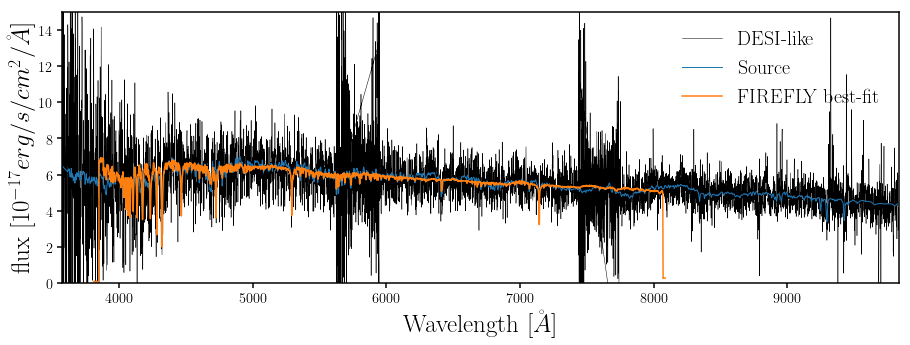

In [33]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
sub.plot(desibgs['wave'], desibgs['flux'], c='k', lw=0.5, label='DESI-like')
sub.plot(source['wave'], source['flux'], c='C0', lw=1, label='Source')
sub.plot(ffly_out['wavelength'] * (1. + zred), ffly_out['flux_bestfit'], c='C1', label='FIREFLY best-fit')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([desibgs['wave'].min(), desibgs['wave'].max()])
sub.set_ylabel('flux [$10^{-17} erg/s/cm^2/\AA$]', fontsize=25)
sub.set_ylim([0., 15.])

(2.0, 8.0)

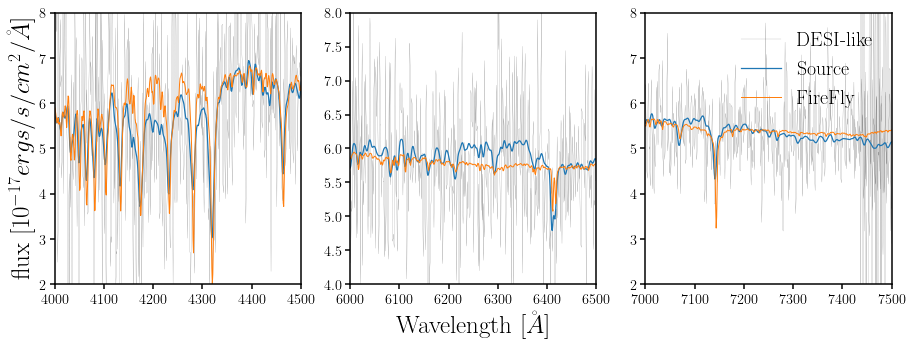

In [10]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(131)
sub.plot(desibgs['wave'], desibgs['flux'], c='k', lw=0.1)
sub.plot(source['wave'], source['flux'], c='C0', lw=1.25)
# MAP m(theta)
sub.plot(ffly_out['wavelength'] * (1. + zred), ffly_out['flux_bestfit'], c='C1', lw=1)
sub.set_xlim([4e3, 4.5e3])
sub.set_ylabel('flux [$10^{-17} ergs/s/cm^2/\AA$]', fontsize=25)
sub.set_ylim([2., 8.])

sub = fig.add_subplot(132)
sub.plot(desibgs['wave'], desibgs['flux'], c='k', lw=0.1)
sub.plot(source['wave'], source['flux'], c='C0', lw=1.25)
# MAP m(theta)
sub.plot(ffly_out['wavelength'] * (1. + zred), ffly_out['flux_bestfit'], c='C1', lw=1)
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([6e3, 6.5e3])
sub.set_ylim([4., 8.])

sub = fig.add_subplot(133)
sub.plot(desibgs['wave'], desibgs['flux'], c='k', lw=0.1, label='DESI-like')
sub.plot(source['wave'], source['flux'], c='C0', lw=1.25, label='Source')
# MAP m(theta)
sub.plot(ffly_out['wavelength'] * (1. + zred), ffly_out['flux_bestfit'], c='C1', lw=1, label='FireFly')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlim([7e3, 7.5e3])
sub.set_ylim([2., 8.])

In [11]:
gal_input = lgal.GalInput(galid)

(0.0, 0.04)

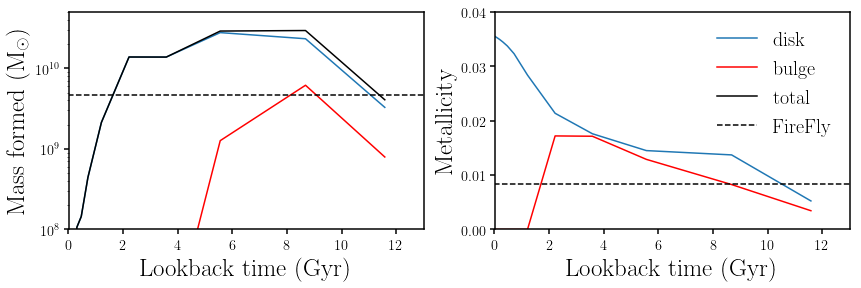

In [13]:
fig = plt.figure(figsize=(14,4))
sub = fig.add_subplot(121)
sub.plot(gal_input['sfh_t'], gal_input['sfh_disk'], color='C0')
sub.plot(gal_input['sfh_t'], gal_input['sfh_bulge'], color='red')
sub.plot(gal_input['sfh_t'], gal_input['sfh_bulge'] + gal_input['sfh_disk'], color='black')
mmed = 10**ffly_prop['stellar_mass']#np.percentile(chain_flat[:,4], [50])
sub.plot([0., 15.], [mmed, mmed], c='k', ls='--')
sub.set_xlabel('Lookback time (Gyr)', fontsize=25)
sub.set_xlim([1e-2, 13.])
sub.set_ylabel(r'Mass formed (M$_\odot$)', fontsize=25)
sub.set_yscale('log')
sub.set_ylim([1e8, 5e10])

sub = fig.add_subplot(122) 
sub.plot(gal_input['sfh_t'], gal_input['Z_disk'], label='disk')
sub.plot(gal_input['sfh_t'], gal_input['Z_bulge'], color='red', label='bulge')
sub.plot([0., 0.], [0., 0.], c='k', ls='-', label='total')
sub.plot([0., 15.], [10**ffly_prop['metallicity_massW'], 10**ffly_prop['metallicity_massW']], c='k', ls='--', label='FireFly')
sub.legend(fontsize=20)
sub.set_xlabel('Lookback time (Gyr)', fontsize=25)
sub.set_xlim([1e-2, 13.])
sub.set_ylabel('Metallicity', fontsize=25)
sub.set_ylim([0., 0.04])

In [14]:
galid = 10924

In [17]:
source, meta = lgal.Spectra(galid, type='source')
desibgs, _ = lgal.Spectra(galid, type='desibgs')
zred = meta['REDSHIFT']
ffly_out, ffly_prop = lgal.SpecFit(galid, type='desibgs', fit='firefly', dust='on')
gal_input = lgal.GalInput(galid)

(0.0, 10.0)

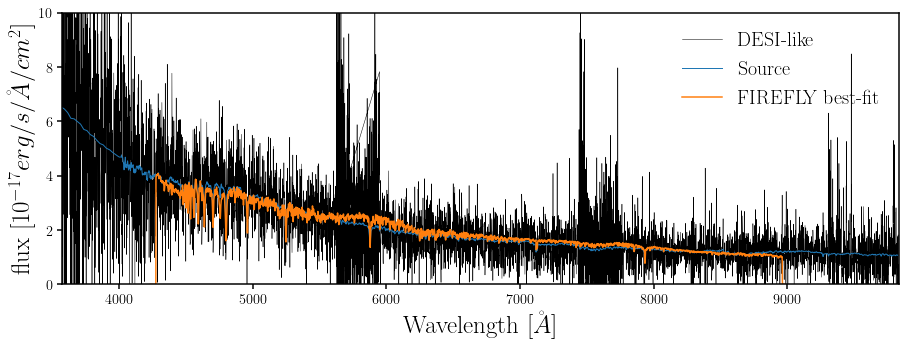

In [18]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
sub.plot(desibgs['wave'], desibgs['flux'], c='k', lw=0.5, label='DESI-like')
sub.plot(source['wave'], source['flux'], c='C0', lw=1, label='Source')
sub.plot(ffly_out['wavelength'] * (1. + zred), ffly_out['flux_bestfit'], c='C1', label='FIREFLY best-fit')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([desibgs['wave'].min(), desibgs['wave'].max()])
sub.set_ylabel('flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)
sub.set_ylim([0., 10.])

(0.0, 0.04)

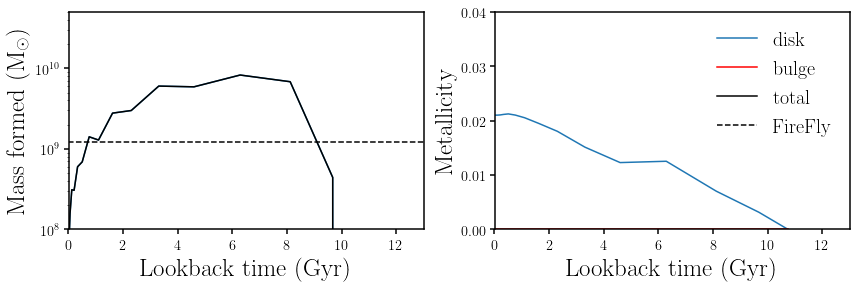

In [19]:
fig = plt.figure(figsize=(14,4))
sub = fig.add_subplot(121)
sub.plot(gal_input['sfh_t'], gal_input['sfh_disk'], color='C0')
sub.plot(gal_input['sfh_t'], gal_input['sfh_bulge'], color='red')
sub.plot(gal_input['sfh_t'], gal_input['sfh_bulge'] + gal_input['sfh_disk'], color='black')
mmed = 10**ffly_prop['stellar_mass']#np.percentile(chain_flat[:,4], [50])
sub.plot([0., 15.], [mmed, mmed], c='k', ls='--')
sub.set_xlabel('Lookback time (Gyr)', fontsize=25)
sub.set_xlim([1e-2, 13.])
sub.set_ylabel(r'Mass formed (M$_\odot$)', fontsize=25)
sub.set_yscale('log')
sub.set_ylim([1e8, 5e10])

sub = fig.add_subplot(122) 
sub.plot(gal_input['sfh_t'], gal_input['Z_disk'], label='disk')
sub.plot(gal_input['sfh_t'], gal_input['Z_bulge'], color='red', label='bulge')
sub.plot([0., 0.], [0., 0.], c='k', ls='-', label='total')
sub.plot([0., 15.], [10**ffly_prop['metallicity_massW'], 10**ffly_prop['metallicity_massW']], c='k', ls='--', label='FireFly')
sub.legend(fontsize=20)
sub.set_xlabel('Lookback time (Gyr)', fontsize=25)
sub.set_xlim([1e-2, 13.])
sub.set_ylabel('Metallicity', fontsize=25)
sub.set_ylim([0., 0.04])

In [23]:
galid = 253044
source, meta = lgal.Spectra(galid, type='source')
desibgs, _ = lgal.Spectra(galid, type='desibgs')
zred = meta['REDSHIFT']
ffly_out, ffly_prop = lgal.SpecFit(galid, type='desibgs', fit='firefly', dust='on')
gal_input = lgal.GalInput(galid)

(0.0, 10.0)

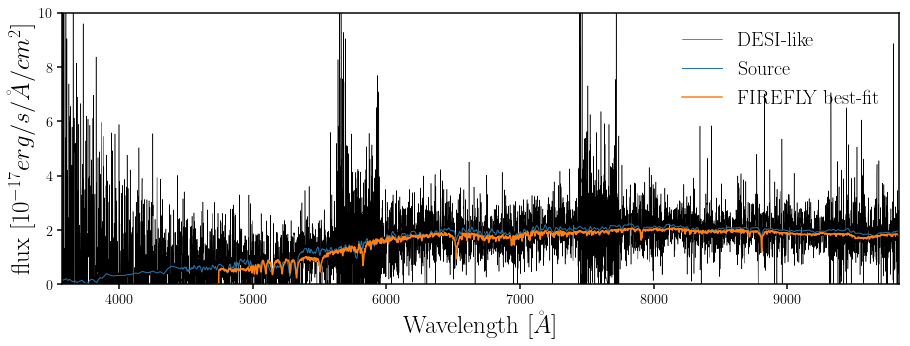

In [24]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
sub.plot(desibgs['wave'], desibgs['flux'], c='k', lw=0.5, label='DESI-like')
sub.plot(source['wave'], source['flux'], c='C0', lw=1, label='Source')
sub.plot(ffly_out['wavelength'] * (1. + zred), ffly_out['flux_bestfit'], c='C1', label='FIREFLY best-fit')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([desibgs['wave'].min(), desibgs['wave'].max()])
sub.set_ylabel('flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)
sub.set_ylim([0., 10.])

(0.0, 0.04)

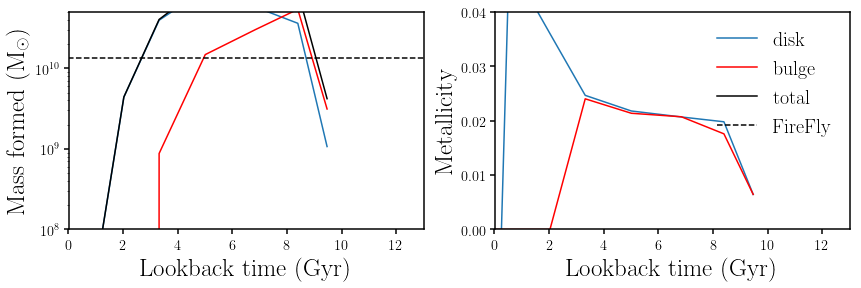

In [25]:
fig = plt.figure(figsize=(14,4))
sub = fig.add_subplot(121)
sub.plot(gal_input['sfh_t'], gal_input['sfh_disk'], color='C0')
sub.plot(gal_input['sfh_t'], gal_input['sfh_bulge'], color='red')
sub.plot(gal_input['sfh_t'], gal_input['sfh_bulge'] + gal_input['sfh_disk'], color='black')
mmed = 10**ffly_prop['stellar_mass']#np.percentile(chain_flat[:,4], [50])
sub.plot([0., 15.], [mmed, mmed], c='k', ls='--')
sub.set_xlabel('Lookback time (Gyr)', fontsize=25)
sub.set_xlim([1e-2, 13.])
sub.set_ylabel(r'Mass formed (M$_\odot$)', fontsize=25)
sub.set_yscale('log')
sub.set_ylim([1e8, 5e10])

sub = fig.add_subplot(122) 
sub.plot(gal_input['sfh_t'], gal_input['Z_disk'], label='disk')
sub.plot(gal_input['sfh_t'], gal_input['Z_bulge'], color='red', label='bulge')
sub.plot([0., 0.], [0., 0.], c='k', ls='-', label='total')
sub.plot([0., 15.], [10**ffly_prop['metallicity_massW'], 10**ffly_prop['metallicity_massW']], c='k', ls='--', label='FireFly')
sub.legend(fontsize=20)
sub.set_xlabel('Lookback time (Gyr)', fontsize=25)
sub.set_xlim([1e-2, 13.])
sub.set_ylabel('Metallicity', fontsize=25)
sub.set_ylim([0., 0.04])